In [35]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import statsmodels.formula.api as smf

In [36]:
data = pd.read_csv('./data/Advertising.csv')

In [37]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [38]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [39]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


/Users/utkarsh/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


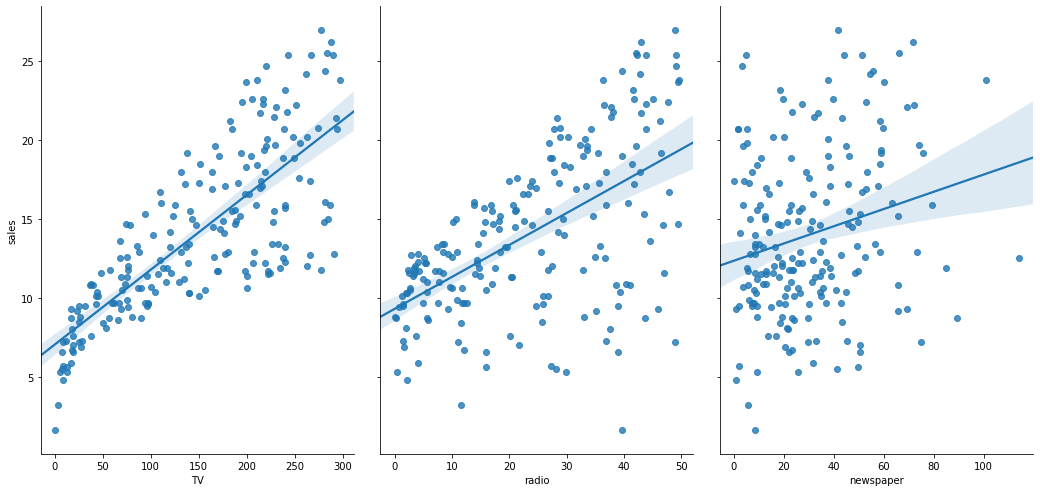

In [41]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [42]:

# create a python list pf feature names
feature_cols = ['TV', 'radio', 'newspaper']

In [43]:

# use the list to select a subset of the original Dataframe
X = data[feature_cols]

In [44]:
y = data['sales']

In [45]:
# default split is 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1)

In [46]:
print(X_train.shape,X_test.shape)

(150, 3) (50, 3)


In [47]:
#instantiate model
linreg = LinearRegression()

In [48]:
# fit the model to the training data and learn the coefficients
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [50]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [51]:
y_pred = linreg.predict(X_test)

In [52]:
# pair the feature names with the coefficients
dict(zip(feature_cols, linreg.coef_))

{'TV': 0.04656456787415028,
 'radio': 0.17915812245088836,
 'newspaper': 0.0034504647111804347}

In [53]:
y_pred = linreg.predict(X_test)

In [54]:
#MAE
print(metrics.mean_absolute_error(y_pred, y_test))

1.0668917082595213


In [55]:
#MSE
print(metrics.mean_squared_error(y_pred, y_test))

1.9730456202283384


In [56]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

1.4046514230328955


In [57]:
# Feature Selection
# Does 'newspaper' belong in our model? Does it improve the quality of our predictions?
# Let's remove it from the model and check the RMSE

# list of feature names
feature_cols = ['TV', 'radio']

# use the feature list to select a subset of original dataframe
X = data[feature_cols]

# select a Series from the dataframe
y = data['sales']

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# calculate the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


In [58]:
# As we want to minimize the model, since RMSE is lower when newspaper is removed it should not be included 
# as a feature in the model

### Ordinary least square Stastics

In [59]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='sales ~ TV', data=data).fit()
lm12 = smf.ols(formula='sales ~ newspaper', data=data).fit()
# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [60]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

7.032593549127693
[0.04753664]


A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales
Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets
Note here that the coefficients represent associations, not causations

In [61]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [62]:
# print the p-values for the model coefficients
lm1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [63]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 28 Dec 2019   Prob (F-statistic):           1.47e-42
Time:                        19:55:33   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
lm12.pvalues

Intercept    4.713507e-49
newspaper    1.148196e-03
dtype: float64

In [66]:
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sat, 28 Dec 2019   Prob (F-statistic):            0.00115
Time:                        19:55:47   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conventional hypothesis test

null hypothesis: There is no relationship between TV ads and Sales β1 equals zero alternative hypothesis: There is a relationship between TV ads and Sales β1 is not equal to zero

p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response In this case, the p-value for TV is far less than 0.05 Low probability coefficient actually zero Reject null hypothesis There is a relationship